In [1]:
import threeplayers as ppp
import twoplayers as pp

import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from numba import jit
import numba as nb
from IPython.display import clear_output
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import PercentFormatter

In [2]:
def plot_complicity():
    alpha, delta = 0.3, 0.95  # values from Klein(2021)
    T = 500000
    N = 100
    prices = np.linspace(0, 1, 7)
    num_calcs = int(T/12500-1)
    summed_avg_profitabilities_three = np.zeros(num_calcs)
    summed_avg_profitabilities_two = np.zeros(num_calcs)

    for n in range(0, N):
        p_table, avg_profs1, avg_profs2, avg_profs3 = ppp.bertrand_simulation(alpha, delta, T, prices)
        per_firm_profit = np.sum([avg_profs1, avg_profs2, avg_profs3], axis=0)/3
        summed_avg_profitabilities_three = np.sum([summed_avg_profitabilities_three, per_firm_profit], axis=0)

        p_table, avg_profs1, avg_profs2 = pp.bertrand_simulation(alpha, delta, T, prices)
        per_firm_profit = np.sum([avg_profs1, avg_profs2], axis=0)/2
        summed_avg_profitabilities_two = np.sum([summed_avg_profitabilities_two, per_firm_profit], axis=0)

    avg_avg_profitabilities_three = np.divide(summed_avg_profitabilities_three, N)
    avg_complicities_three = np.divide(avg_avg_profitabilities_three, 0.08333)

    avg_avg_profitabilities_two = np.divide(summed_avg_profitabilities_two, N)
    avg_complicities_two = np.divide(avg_avg_profitabilities_two, 0.125) 

    fig, axs = plt.subplots(1)
    fig.suptitle("Average per-firm complicity in 100 different simulations (500000 runs each)")
    fig.set_figheight(6)
    fig.set_figwidth(9)
    axs.set_xlabel("t")
    axs.set_ylabel("Complicity")
    axs.set_ylim(0, 1)
    xs = np.linspace(0, T, num_calcs)
    axs.plot(xs, avg_complicities_three, color="grey", label = "average complicity, three players", marker='o')
    axs.plot(xs, avg_complicities_two, color="black", label = "average complicity, two players", marker='o')
    #axs.plot(xs, [0.08333]*len(xs), color='orange', label='joint-profit maximizing', linestyle='dashed')
    axs.plot(xs, [0.040/0.08333]*len(xs), color='grey', label='competitive benchmark, three players', linestyle='dashed')
    axs.plot(xs, [0.0611/0.125]*len(xs), color='black', label='competitive benchmark, two players', linestyle='dashed')
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    #axs.xaxis.set_major_locator(ticker.MultipleLocator(1))
    #axs.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    #fig.tight_layout()
    plt.legend(loc='upper right')
    #plt.show()
    plt.savefig("complicity_number_of_firms.png")

In [3]:
#plot_complicity()

In [4]:
# ## useless plots, we will not use these
# alpha, delta = 0.3, 0.95  # values from Klein(2021)
# T = 500000
# N = 10
# prices = np.linspace(0, 1, 7)
# num_calcs = int(T/12500-1)
# variances2 = np.zeros(num_calcs)
# variances3 = np.zeros(num_calcs)
# fig, axs = plt.subplots(N, figsize=(8,29))
# for n in range(0, N):
#     p_table, avg_profs1, avg_profs2 = pp.bertrand_simulation(alpha, delta, T, prices)
#     
#     # compute rolling avg price variance over time
#     for i in range(0, T, 12500):
#         if i >= 12500:
#             var0 = np.var(p_table[0, i-1000:i])
#             var1 = np.var(p_table[1, i-1000:i])
#             avg_var = np.mean([var0, var1])
#             variances2[int(i/12500)-1] = avg_var
#         else:
#             pass
#     p_table, avg_profs1, avg_profs2, avg_profs3 = ppp.bertrand_simulation(alpha, delta, T, prices)
#     for i in range(0, T, 12500):
#         if i >= 12500:
#             var0 = np.var(p_table[0, i-1000:i])
#             var1 = np.var(p_table[1, i-1000:i])
#             var2 = np.var(p_table[2, i-1000:i])
#             avg_var = np.mean([var0, var1, var2])
#             variances3[int(i/12500)-1] = avg_var
#         else:
#             pass
#     fig.suptitle("Average variance in price over time")
#     #fig.set_figheight(6)
#     #fig.set_figwidth(9)
#     axs[n].set_xlabel("t")
#     axs[n].set_ylabel("Price variance")
#     xs = np.linspace(0, T, num_calcs)
#     axs[n].plot(xs, variances2, color="grey", label = "two players", marker='o')
#     axs[n].plot(xs, variances3, color="black", label = "three players", marker='o')
#     axs[n].legend(loc='upper right')
# fig.tight_layout()
# plt.show()

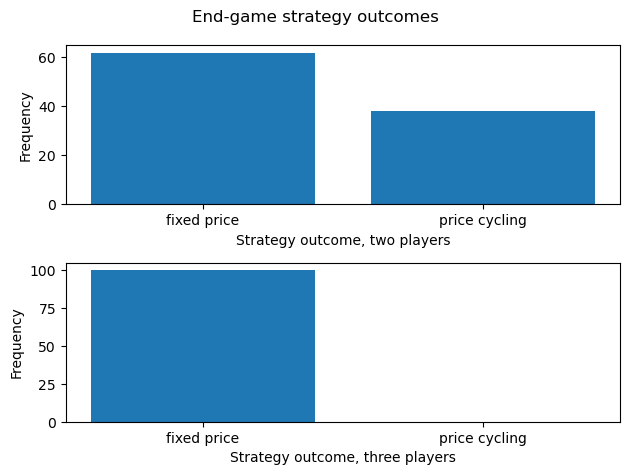

In [5]:
alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 100
prices = np.linspace(0, 1, 7)
num_calcs = int(T/12500-1)

cycle2 = 0
fixed2 = 0
cycle3 = 0
fixed3 = 0


for n in range(0, N):
    p_table, avg_profs1, avg_profs2 = pp.bertrand_simulation(alpha, delta, T, prices)

    var0 = np.var(p_table[0, -1000:])
    var1 = np.var(p_table[1, -1000:])
    avg_var = np.mean([var0, var1])
    if abs(avg_var - 0) < 0.01:
        fixed2 += 1
    else:
        cycle2 += 1
        
    p_table, avg_profs1, avg_profs2, avg_profs3 = ppp.bertrand_simulation(alpha, delta, T, prices)

    var0 = np.var(p_table[0, -1000:])
    var1 = np.var(p_table[1, -1000:])
    var2 = np.var(p_table[2, -1000:])
    avg_var = np.mean([var0, var1, var2])
    if abs(avg_var - 0) < 0.01:
        fixed3 += 1
    else:
        cycle3 += 1

fig, axs = plt.subplots(2)
fig.suptitle("End-game strategy outcomes")
strats = ['fixed price','price cycling']
outcomes = [fixed2, cycle2]
axs[0].set_xlabel("Strategy outcome, two players")
axs[0].set_ylabel("Frequency")
axs[0].bar(strats, outcomes)
#axs[0].legend(loc='upper right')

outcomes = [fixed3, cycle3]
axs[1].set_xlabel("Strategy outcome, three players")
axs[1].set_ylabel("Frequency")
axs[1].bar(strats, outcomes)
#axs[0].legend(loc='upper right')
fig.tight_layout()
plt.show()